In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import rlkit.torch.pytorch_util as ptu
from rlkit.data_management.load_buffer_real import *
from rlkit.envs.dummy_env import DummyEnv

import numpy as np

In [2]:
%matplotlib inline
args = lambda:0 #RANDOM Object
paths = []
observation_key = 'image'

paths.append(('/home/asap7772/asap7772/real_data_kitchen/bridge_data_numpy/toykitchen2_room8052/put_potato_on_plate/out.npy','/home/asap7772/asap7772/real_data_kitchen/bridge_data_numpy/toykitchen2_room8052/put_potato_on_plate/out_rew.npy'))

replay_buffer = get_buffer(observation_key=observation_key, color_jitter = False, num_viewpoints=5, action_shape=(7,))
for path, rew_path in paths:
    print(path)
    load_path_kitchen(path, rew_path, replay_buffer)

OrderedDict([('image', Box(0.0, 255.0, (64, 64, 3), float32)), ('state', Box(-1.0, 1.0, (3,), float32))]) [] ['image']
/home/asap7772/asap7772/real_data_kitchen/bridge_data_numpy/toykitchen2_room8052/put_potato_on_plate/out.npy


In [3]:
batch = replay_buffer.random_batch(256)

In [4]:
batch.keys()

dict_keys(['observations', 'actions', 'next_actions', 'rewards', 'mcrewards', 'object_positions', 'terminals', 'next_observations', 'curr_diff', 'indices', 'other_viewpoints', 'next_other_viewpoints', 'latents', 'next_latents'])

In [5]:
%matplotlib inline

torch.Size([3, 64, 64])
torch.Size([3, 64, 64])


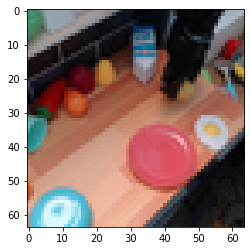

In [11]:
img_tens = ptu.from_numpy(batch['observations'][1].reshape(3,64,64))
print(img_tens.shape)
inv_idx = torch.arange(img_tens.size(0)-1, -1, -1).long()
img_tens = img_tens[inv_idx]

img_tens_otro = ptu.from_numpy(batch['other_viewpoints'][1][1].reshape(3,64,64))
print(img_tens_otro.shape)

def plot_img(obs_img):
    if type(obs_img) == torch.Tensor:
        from torchvision import transforms
        im_new = transforms.ToPILImage()(obs_img.cpu())
    else:
        im_new = obs_img
    plt.imshow(im_new)
plot_img(img_tens_otro)

In [7]:
img_tens

tensor([[[0.4588, 0.4314, 0.4902,  ..., 0.0824, 0.0471, 0.0471],
         [0.4706, 0.4235, 0.4745,  ..., 0.0784, 0.0392, 0.0314],
         [0.4706, 0.4157, 0.4627,  ..., 0.0667, 0.0980, 0.0863],
         ...,
         [0.2118, 0.2235, 0.2196,  ..., 0.4588, 0.4667, 0.5725],
         [0.1843, 0.1490, 0.1686,  ..., 0.4706, 0.4667, 0.4549],
         [0.2314, 0.1804, 0.1765,  ..., 0.4510, 0.4510, 0.4627]],

        [[0.4902, 0.4627, 0.5137,  ..., 0.0706, 0.0471, 0.0471],
         [0.4980, 0.4510, 0.5020,  ..., 0.0745, 0.0392, 0.0314],
         [0.4980, 0.4510, 0.4863,  ..., 0.0549, 0.0980, 0.0863],
         ...,
         [0.2196, 0.2275, 0.2314,  ..., 0.4510, 0.4549, 0.5686],
         [0.1922, 0.1608, 0.1765,  ..., 0.4588, 0.4588, 0.4431],
         [0.2235, 0.1961, 0.1804,  ..., 0.4392, 0.4471, 0.4588]],

        [[0.5255, 0.5059, 0.5373,  ..., 0.0667, 0.0471, 0.0471],
         [0.5333, 0.4980, 0.5373,  ..., 0.0667, 0.0392, 0.0314],
         [0.5333, 0.4980, 0.5255,  ..., 0.0549, 0.0941, 0.

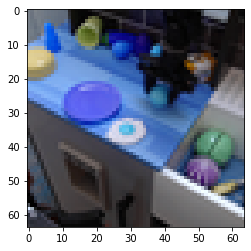

In [8]:
plot_img(img_tens)

In [9]:
batch['actions']

array([[-1.5914259e-09,  4.2994552e-10, -3.6510568e-09, ...,
        -5.6412898e-07, -7.0094451e-08,  3.8819592e-03],
       [-1.8279777e-01,  4.5010304e-01, -6.8398573e-02, ...,
         3.2542291e-01, -1.2589055e-01,  9.2644924e-01],
       [-4.0306255e-02,  5.7215057e-02, -1.3210101e-01, ...,
        -6.4671516e-01,  3.9479557e-01,  1.6816182e-01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  2.5451111e-02],
       [ 1.1433722e-01,  3.1929874e-01, -2.6331508e-01, ...,
        -6.5058464e-01, -4.9007687e-01,  1.0034998e-01],
       [-4.6193701e-01,  1.4095636e-01,  4.6821189e-01, ...,
         1.0000000e+00,  4.2063826e-01,  8.4643167e-01]], dtype=float32)

In [ ]:
batch['terminals']

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
batch['rewards']

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [ ]:
batch['next_actions']

array([[-2.4162750e-03, -4.6663207e-04, -2.7338058e-02, ...,
        -3.4337118e-03,  5.9345871e-02,  0.0000000e+00],
       [-1.2037771e-02,  1.8518342e-02,  1.7952848e-03, ...,
         7.3764734e-03,  9.8643675e-03,  0.0000000e+00],
       [ 2.1938190e-02, -7.4218060e-03, -8.0878474e-03, ...,
        -4.5033707e-03, -7.0193924e-02,  0.0000000e+00],
       ...,
       [ 1.5224961e-03,  8.3081319e-04, -8.6353207e-03, ...,
        -4.4744737e-02, -1.6744258e-02,  1.0000000e+00],
       [-1.4482545e-02,  4.6511486e-02,  4.5186359e-02, ...,
         9.0777032e-02, -1.4427234e-02,  0.0000000e+00],
       [-1.7931673e-03, -1.0592254e-02, -8.1720290e-04, ...,
        -1.3050569e-02, -2.7340113e-03,  1.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
data = np.load('/home/asap7772/asap7772/real_data_kitchen/bridge_data_numpy/toykitchen2_room8052/put_potato_on_plate/out.npy', allow_pickle=True)
image_data = data[0]['observations'][0]['images0']

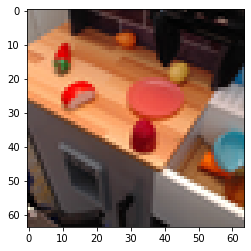

In [ ]:
plot_img(torch.from_numpy(image_data.reshape(3,64,64)))

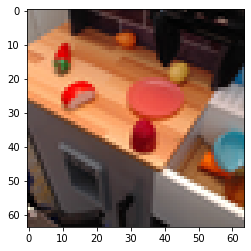

In [ ]:
import matplotlib.pyplot as plt
# plot_img(replay_buffer._obs['image'][0].reshape(3,64,64).transpose(1,2,0)
plt.imshow(replay_buffer._obs['image'][0].reshape(3,64,64).transpose(1,2,0))

In [ ]:
replay_buffer._obs['image'][0].max()

255

In [ ]:
replay_buffer._obs['image'][0].min()

0

tensor([0.1631, 0.2199, 0.1864, 0.3943, 0.3231, 0.3866, 0.3880])


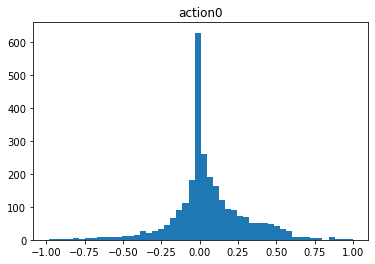

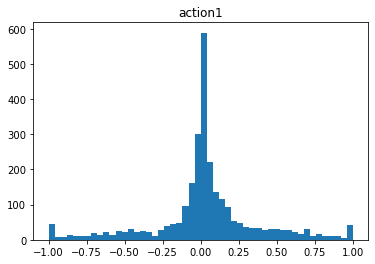

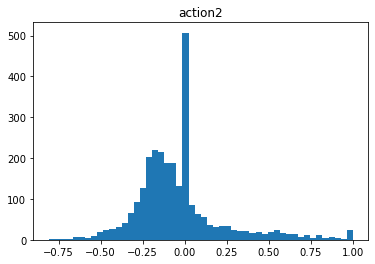

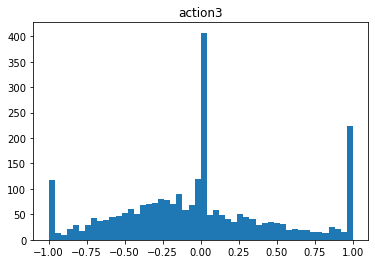

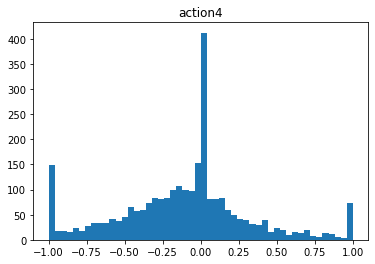

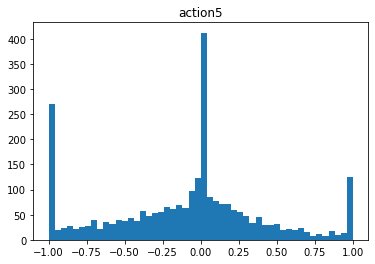

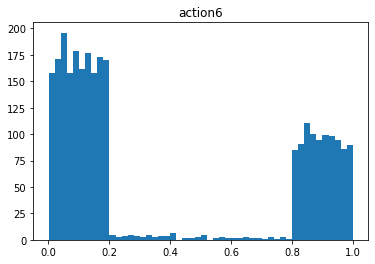

In [ ]:
all_actions = replay_buffer._actions[:replay_buffer._top]

replay_buffer._actions[:replay_buffer._top][:,0] = np.clip(all_actions[:,0]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,1] = np.clip(all_actions[:,1]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,2] = np.clip(all_actions[:,2]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,3] = np.clip(all_actions[:,3]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,4] = np.clip(all_actions[:,4]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,5] = np.clip(all_actions[:,5]*20, -1, 1)
replay_buffer._actions[:replay_buffer._top][:,6] = np.clip(all_actions[:,6]*-0.8+.9 + np.random.uniform(-.1,.1, all_actions[:,6].shape), -1, 1)

all_actions = replay_buffer._actions[:replay_buffer._top]

print(torch.from_numpy(all_actions).abs().mean(0))
path = '/nfs/kun1/users/asap7772/cog/hist_out'
for i in range(all_actions.shape[-1]):
    plt.hist(all_actions[:,i],50)
    plt.title('action' + str(i))
    plt.savefig(path + '/action' + str(i) + '.png')
    plt.show()